### Defines pattern time for pipe status.

This example contains:
* Add paths and load inp file.
* Get times.
* Get Pipe infos.
* Find the max length of link pipe names.
* Times.
* Create random status for pipes every hour.
* Unload library.

In [1]:
import pandas as pd
import random
import time
from epyt import epanet

# Load network
d = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.0.5).
Input File Net1.inp loaded successfully.



In [2]:
start = time.time()
# Get times.
hydstep = d.getTimeHydraulicStep()
duration = d.getTimeSimulationDuration()

# Get Pipe infos.
pipe_count = d.getLinkPipeCount()
pipeIDs = d.getLinkPipeNameID()
# Find the max length of link pipe names.
spsmax = len(max(pipeIDs, key=len))

# Times.
hrs = int(duration / 3600)
hours = list(range(0, hrs))
# step = list(range(0,hydstep))/list(range(60,55)) # step 30min
Time = []
Controls = []

for u in range(hrs):
    status = []
    # Create random status for pipes every hour.
    status_code = [random.randint(0, 1) for i in range(pipe_count)]
    for k in status_code:
        status.append('OPEN') if status_code[k] else status.append('CLOSED')
    for npp in range(pipe_count):
        Time.append('0%d:00:00' % (hours[u]))
        Controls.append('LINK ' + pipeIDs[npp] + ' ' + status[npp] + ' AT CLOCKTIME ' + '0%d:00:00' % (hours[u]))
        d.addControls('LINK ' + pipeIDs[npp] + ' ' + status[npp] + ' AT CLOCKTIME ' + '0%d:00:00' % (hours[u]))

print('Create random status')
# Print overall run time
stop = time.time()
print(f'\n Overall time is {stop - start} sec')

Create random status

 Overall time is 0.006897926330566406 sec


C:\Users\mkiri\OneDrive - University of Cyprus\GITHUB\EPyT\epyt\epanet.py:11809: UserWarning: WARNING: System has negative pressures.
  warnings.warn(errmssg.value.decode())


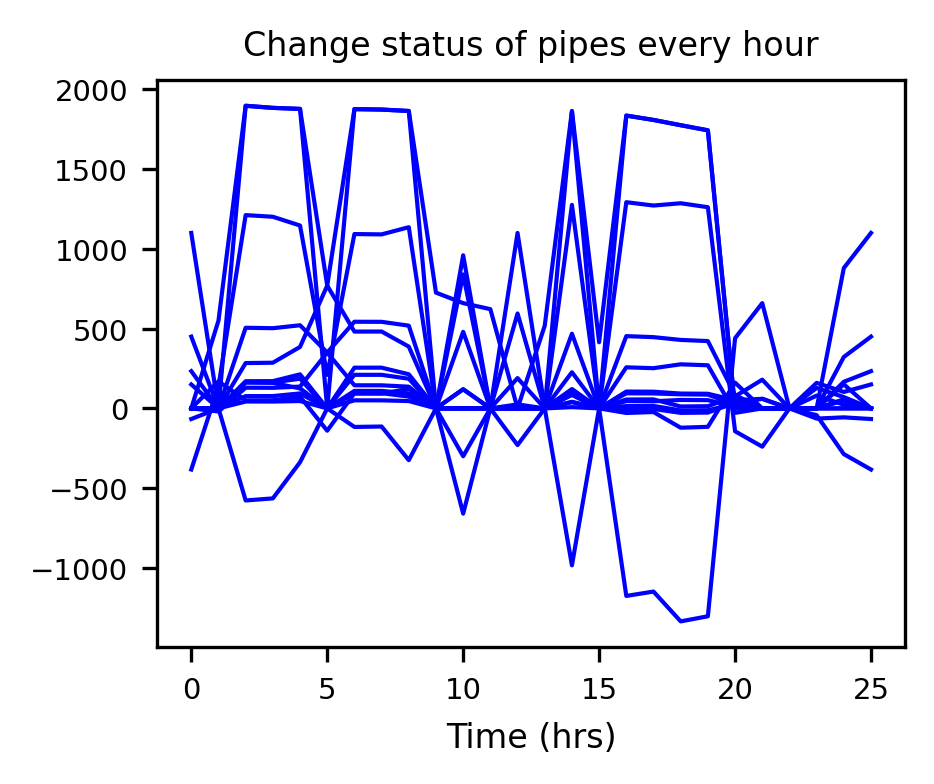

In [3]:
d.plot_ts(Y=pd.DataFrame(d.getComputedHydraulicTimeSeries().Flow), title='Change status of pipes every hour',
          xlabel='Time (hrs)', marker=False, color='b', fontsize=8)

In [4]:
# Unload library.
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.

